# Kaggle: Bike Sharing Demand 
- Competition: [Here](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
- This is the code referenced by [here](https://didu-story.tistory.com/43?category=937100)

## Goal
- You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.
    - 2년의 시간당 임대 데이터가 제공
    - Train Set: ~19일
    - Test Set: 20일~
    - sampleSubmission.csv 파일은 어떤식으로 저장해서 제출해야되는지 설명
    - 테스트 세트가 적용되는 각 시간 동안 대여한 자전거의 총 수 예측

## Data정보
|필드명|설명|
|----|----|
|datetime|2011-01-20 00:00:00와 같은 시간|
|season|1: 봄, 2: 여름, 3: 가을, 4: 겨울|
|holiday|공휴일(1), 그 외(0)|
|workingday|근무일(1), 그 외(0)|
|weather| 1: 맑은 날씨, 2: 약간의 안개와 구름, 3: 약간의 눈과 비, 4: 폭우|
|Temp|온도(C)|
|atemp|체감온도(C)|
|humidity|습도|
|windspeed|풍속|
|casual|비회원 자전거 대여량|
|registered|회원 자전거 대여량|
|count|총 자전거 대여량|

## Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy
import warnings

In [2]:
warnings.filterwarnings('ignore')

## 데이터 확인
### 데이터 훑어보기

In [3]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
submission = pd.read_csv('dataset/sampleSubmission.csv')

In [4]:
train.columns, test.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'))

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


- datetime의 형태가 object이기 때문에 datetime로 바꿔주기

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [11]:
train.shape, test.shape

((10886, 12), (6493, 9))

- 데이터 갯수
    - train: 10,886
    - test: 6,493

### Data EDA
- 데이터 시각화, null 처리 등

#### 기준 별 자전거 수요량 확인하기(시각화)

In [12]:
# datatime 쪼개기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
# dayofweek 는 요일을 가져오는 말
#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
test['dayofweek'] = test['datetime'].dt.dayofweek

##### 년도 별 자전거 수요량

<AxesSubplot:xlabel='year', ylabel='count'>

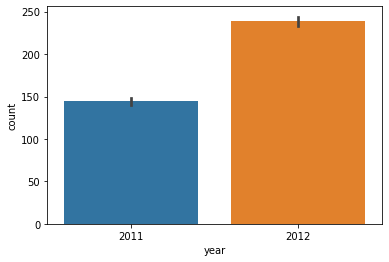

In [13]:
sns.barplot(data=train, x='year', y='count')

- 2011년보다 2012년도에 자전거 수요 증가
- 두 년도긴 하지만 유의미한 변화가 있기 때문에 필요한 column

##### 월 별 자전거 수요량

<AxesSubplot:xlabel='month', ylabel='count'>

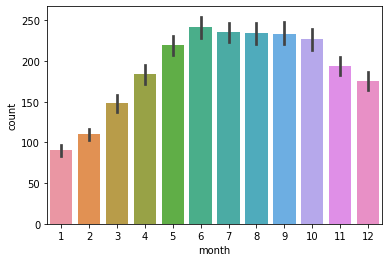

In [14]:
sns.barplot(data=train, x='month', y='count')

- 겨울의 자전거 수요가 매우 적고, 여름의 자전거 수요가 많은 것을 확인할 수 임ㅅ음
- 월 별 유의미한 값이 있기 때문에 필요한 column

##### 일 별 자전거 수요량

<AxesSubplot:xlabel='day', ylabel='count'>

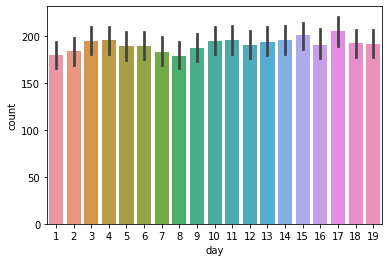

In [15]:
sns.barplot(data=train, x='day', y='count')

- 별 차이가 없어서 필요한 값인지 잘 모르겠음!

##### 계절 별 자전거 수요량

<AxesSubplot:xlabel='season', ylabel='count'>

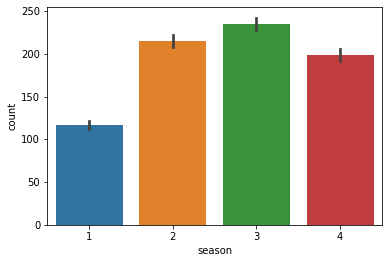

In [16]:
sns.barplot(data=train, x='season', y='count')

- season을 나누는 단위가 일반적으로 봄, 여름, 가을, 겨울 이 아님

In [17]:
for i in range(1, 5):
    print(str(i), ":", train[train['season'] == i].month.unique())

1 : [1 2 3]
2 : [4 5 6]
3 : [7 8 9]
4 : [10 11 12]


##### 시간대별 point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

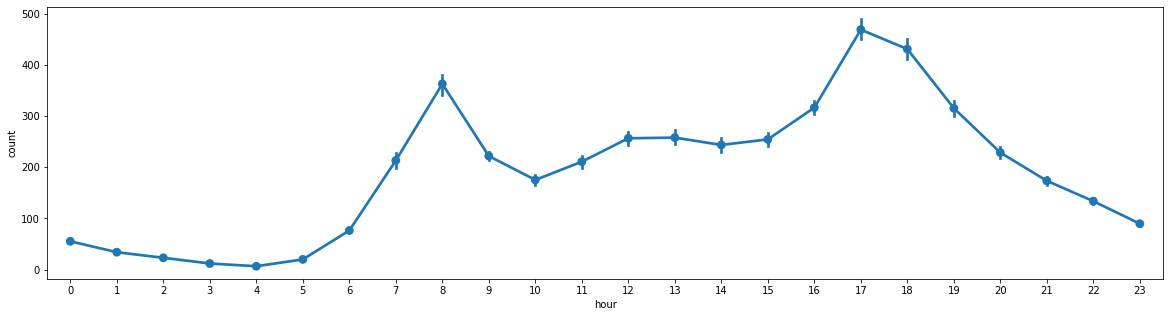

In [18]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 5) #가로, 세로
sns.pointplot(data=train, x='hour', y='count', ax=ax1)

- 출 퇴근 시간인 8시, 17시경에 자전거 수요량이 많음

##### workingday별 자전거 수요

<AxesSubplot:xlabel='hour', ylabel='count'>

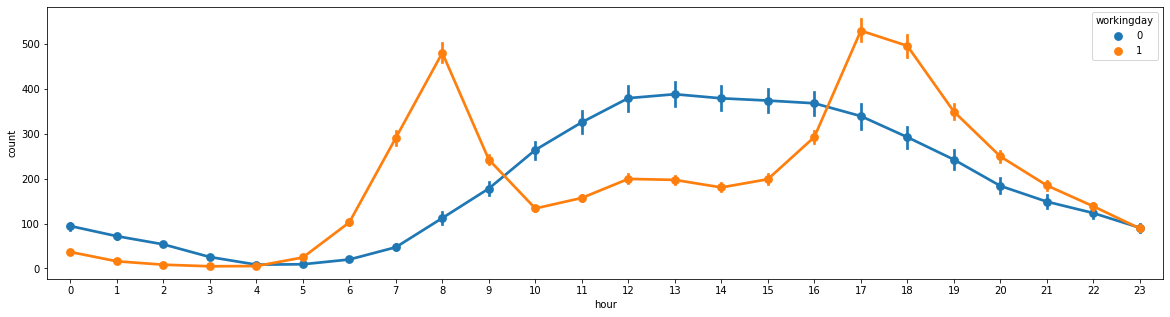

In [19]:
fig, ax2 = plt.subplots()
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)

##### holiday 별 자전거 수요

<AxesSubplot:xlabel='hour', ylabel='count'>

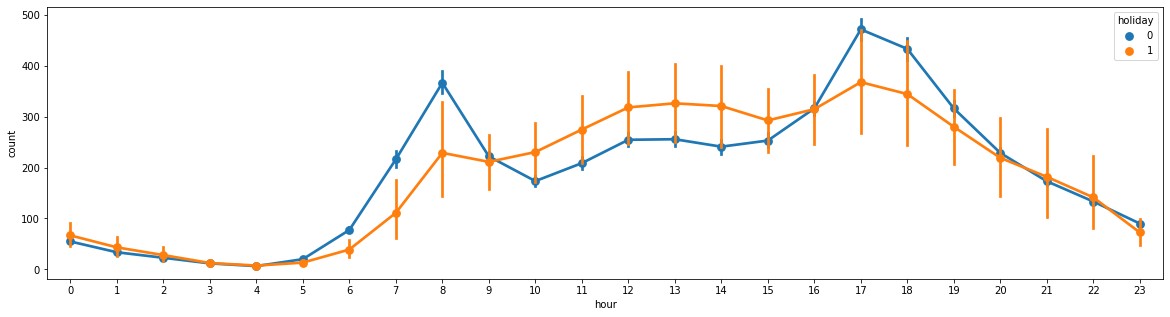

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=ax)

- 휴일이 아닐 때는 주로 출/퇴근 시간대에 자전거 수요 증가
- 휴일일 때는 오후 시간대에 증가

##### 날씨 별 자전거 수요

<AxesSubplot:xlabel='hour', ylabel='count'>

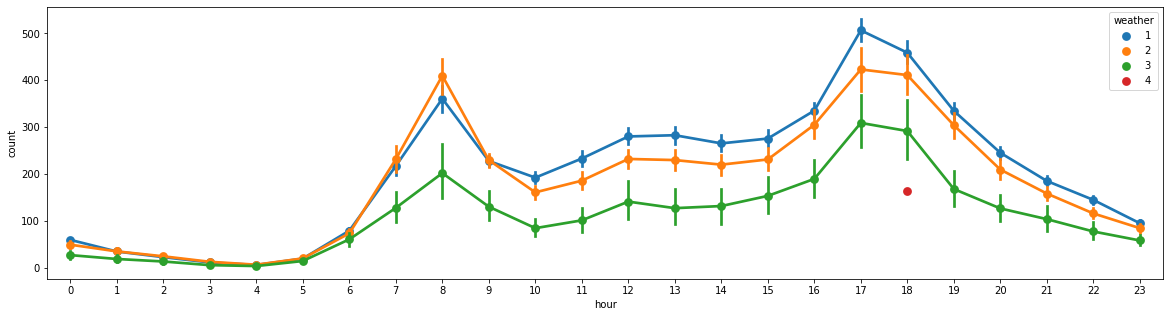

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax)

- 1, 2 > 3 >> 4

##### dayofweek 수요

<AxesSubplot:xlabel='hour', ylabel='count'>

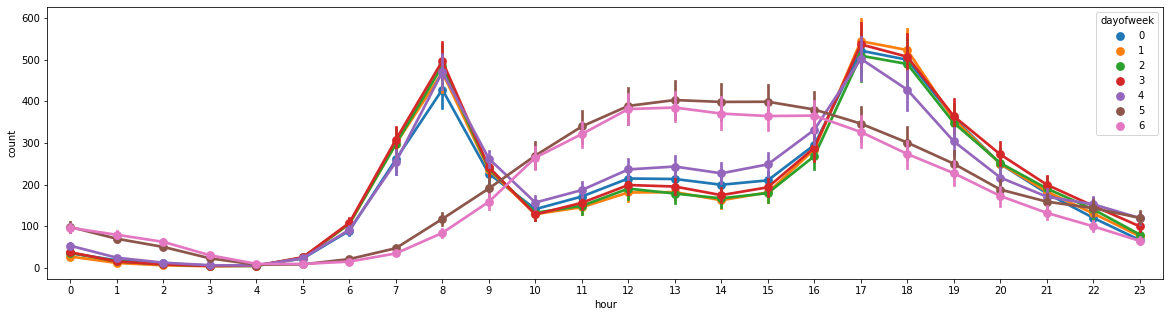

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax)

- 휴일과 아닐때의 차이가 존재

### 변수끼리의 상관관계

<AxesSubplot:>

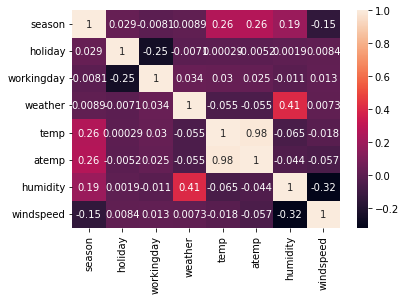

In [23]:
corr_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed']]
sns.heatmap(corr_data.corr(), annot=True)

- temp와 atemp의 상관관계가 너무 높기 때문에 하나만 사용(다중공선성)

### 온도, 습도, 바람세기(연속형 변수)
- scatter plot그리기

<AxesSubplot:xlabel='windspeed', ylabel='count'>

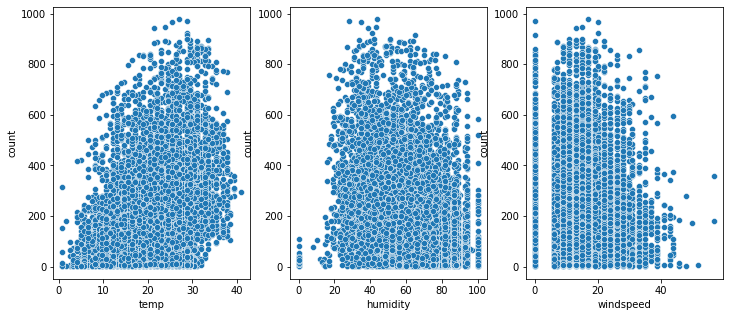

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))
sns.scatterplot(data=train, x='temp', y='count', ax=ax1)
sns.scatterplot(data=train, x='humidity', y='count', ax=ax2)
sns.scatterplot(data=train, x='windspeed', y='count', ax=ax3)

!!!! 바람의 세기가 0인 부분이 너무 많음!!!!

In [25]:
len(train[train['windspeed']==0])

1313

--- feature engineering 필요!!!

## Feature Engineering

### 이상치 제거
#### 이상치 확인

<AxesSubplot:xlabel='count'>

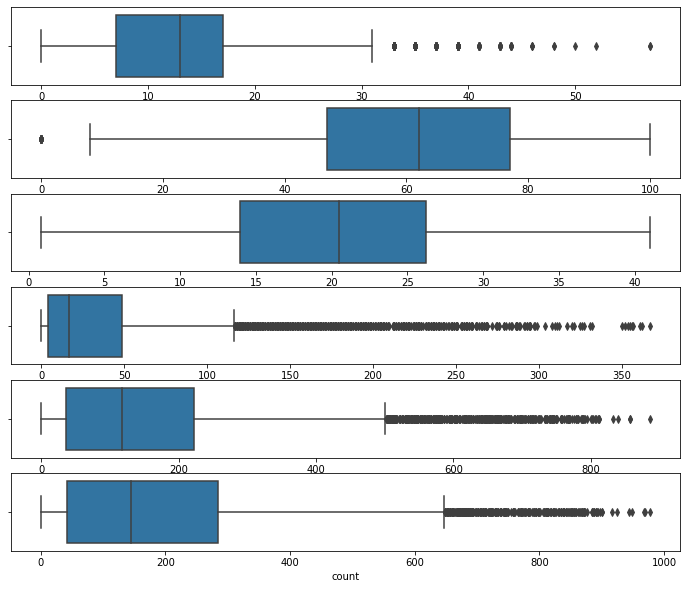

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [27]:
from collections import Counter

def detect_outliers(data, n, cols):
    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [28]:
outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [29]:
train.shape

(10886, 19)

In [30]:
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
train.shape

(10846, 19)

<AxesSubplot:xlabel='count'>

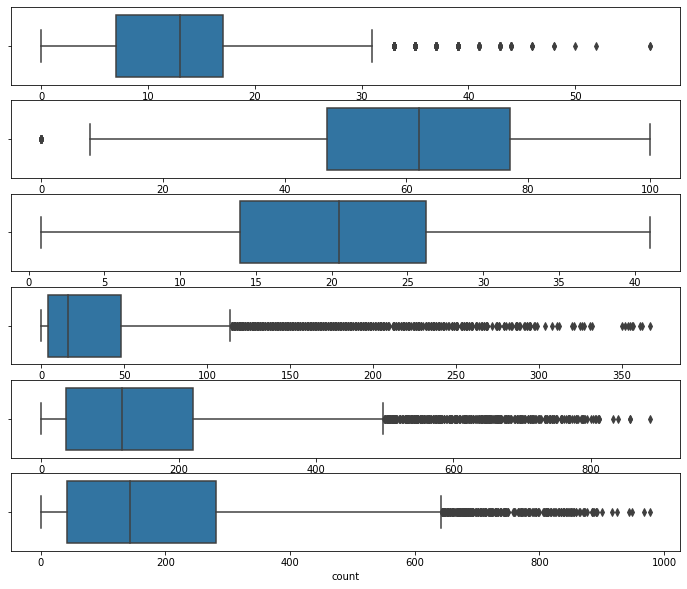

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

#### 왜도, 첨도 확인

- 왜도
    - 데이터의 분포가 한쪽으로 쏠린 정도
    - -2 < < 2여야 치우침이 없는 데이터
- 첨도
    - 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것
    - 첨도가 높으면 outlier가 많음을 의미

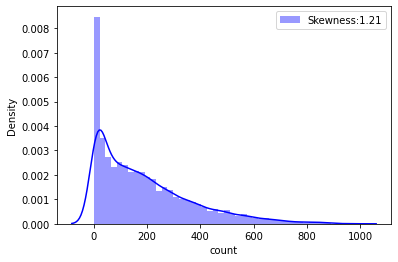

In [32]:
fig, ax = plt.subplots()
graph = sns.distplot(train['count'], color='b', label='Skewness:{:.2f}'.format(train['count'].skew()), ax=ax)
graph = graph.legend(loc='best')

In [33]:
'skeweness(왜도): {:.2f}'.format(train['count'].skew())

'skeweness(왜도): 1.21'

In [34]:
'kurtosis(첨도): {:.2f}'.format(train['count'].kurt())

'kurtosis(첨도): 1.20'

- count가 0이 굉장히 많기 때문에 log-scaling을 통해 정규화!

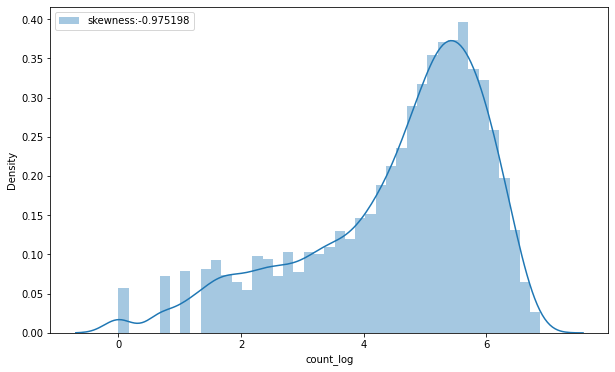

In [35]:
train['count_log'] = train['count'].map(lambda x: np.log(x) if i > 0 else 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
graph = sns.distplot(train['count_log'], label='skewness:{:2f}'.format(train['count_log'].skew()), ax=ax)
graph = graph.legend(loc='best')

In [36]:
'skeweness(왜도): {:.2f}'.format(train['count_log'].skew())

'skeweness(왜도): -0.98'

In [37]:
'kurtosis(첨도): {:.2f}'.format(train['count_log'].kurt())

'kurtosis(첨도): 0.25'

In [38]:
# count_log로 대체했으므로 제거
train.drop('count', axis=1, inplace=True)

##### windspeed = 0 대체 값 찾기
- 풍속이 0일 때 거의 없는 것을 고려하여 대체

[결측값 처리 방법]
- 결측값을 앞 방향 혹은 뒷 방향으로 채우기
- 결측값을 변수별 평균으로 채우기
- 결측값을 가진 데이터를 삭제하기
- 결측값을 0이나, 아예 다른 값으로 대체하기
- 결측값을 예측된 값으로 대체하기

In [39]:
# Randomforest로 대체
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]
    
    #풍속이 날씨변수이기 때문에 날씨변수를 활용해서 windspeed를 예측해줄 것
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    #windspeed가 0이 아닌 컬럼으로 fit 해줌
    #model.fit(X_train, y_train)
    rf.fit(windnot0[col], windnot0['windspeed'])
 
    #windspeed가 0인 부분을 예측
    #model.predict(X_test)
    pred_wind0 = rf.predict(X = wind0[col])
    
    #wind0의 windspeed 값을 pred_wind0으로 바꿔주고
    wind0['windspeed'] = pred_wind0
    
    #windnot0과 wind0을 합쳐준다
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
   
    return data

In [40]:
train = predict_windspeed(train)
test = predict_windspeed(test)

In [41]:
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,count_log


<AxesSubplot:xlabel='windspeed', ylabel='count'>

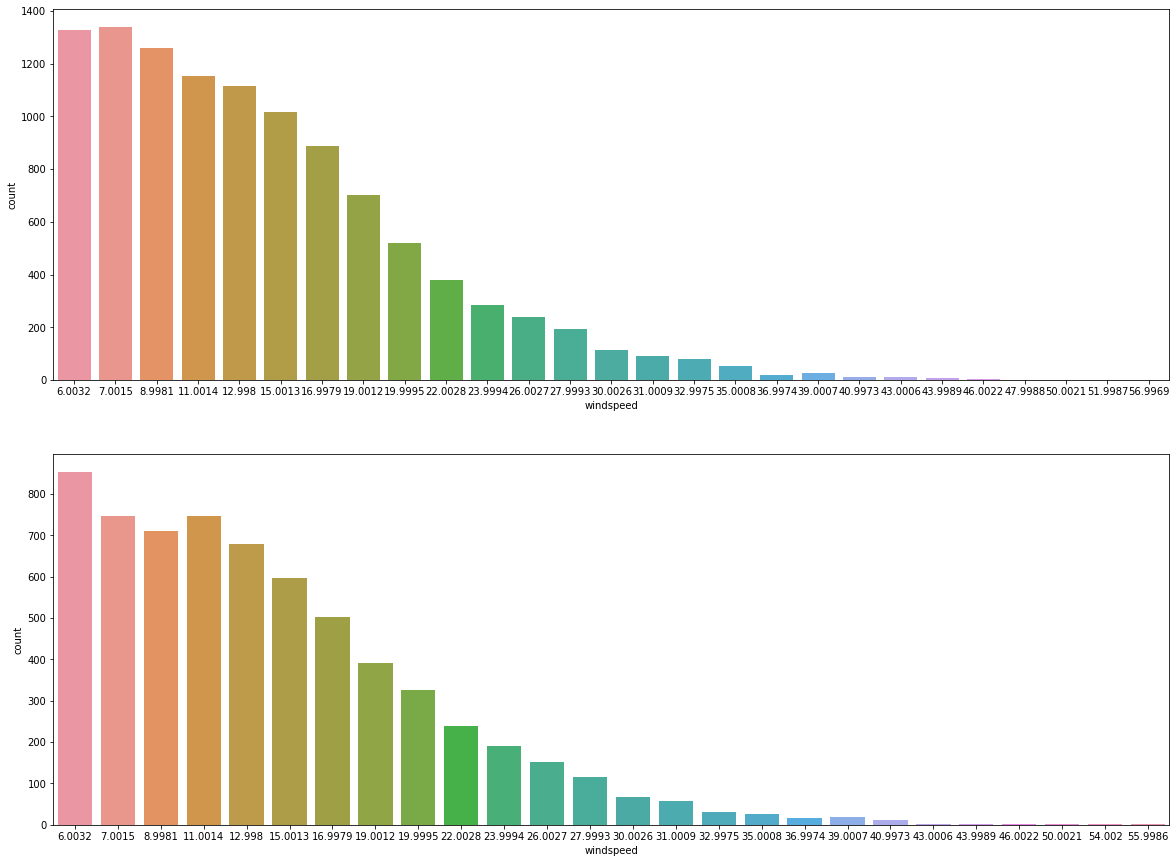

In [42]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

#갯수를 세야하니 countplot
sns.countplot(data = train, x = 'windspeed', ax = ax1)
sns.countplot(data = test, x = 'windspeed', ax = ax2)

#### one-hot encoding범주형 변수 처리
- Season
- Holiday
- Workingday
- Weather

In [43]:
train = pd.get_dummies(train, columns = ['weather'], prefix = 'weather')
test = pd.get_dummies(test, columns = ['weather'], prefix = 'weather')

train = pd.get_dummies(train, columns = ['season'], prefix = 'season')
test = pd.get_dummies(test, columns = ['season'], prefix = 'season')

train = pd.get_dummies(train, columns = ['holiday'], prefix = 'holiday')
test = pd.get_dummies(test, columns = ['holiday'], prefix = 'holiday')

In [44]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'dayofweek', 'count_log', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [45]:
test.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

## Modeling

### 변수 고르기
- 제거할 변수
    - workingday: holiday와 유사
    - datetime, minute, second: 큰 의미 없는 것으로 판별
    - atemp: temp와 상관관계 높아 다중공선성 의심

In [46]:
test_datetime = test['datetime']
train.drop(['datetime', 'workingday', 'minute', 'second', 'atemp', 'casual', 'registered'], axis=1, inplace=True)
test.drop(['datetime', 'workingday', 'minute', 'second', 'atemp'], axis=1, inplace=True)

In [47]:
train.columns, test.columns

(Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
        'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
        'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
        'holiday_0', 'holiday_1'],
       dtype='object'),
 Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
        'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
        'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
        'holiday_1'],
       dtype='object'))

### 모델 학습하기

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
#데이터프레임 형태가 아닌 array 형태여야하기때문에 values를 취해줌
x_train = train.drop('count_log', axis = 1).values
target_label = train['count_log'].values
x_test = test.values

# train : val = 0.8 : 0.2 로 split
x_train, x_val, y_train, y_val = train_test_split(x_train, target_label, test_size = 0.2, random_state = 2000)

In [50]:
x_train

array([[32.8   , 49.    ,  7.0015, ...,  0.    ,  1.    ,  0.    ],
       [13.12  , 45.    , 16.9979, ...,  1.    ,  1.    ,  0.    ],
       [26.24  , 73.    ,  6.0032, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [22.96  , 37.    , 19.0012, ...,  0.    ,  1.    ,  0.    ],
       [18.86  , 63.    ,  8.9981, ...,  1.    ,  1.    ,  0.    ],
       [17.22  , 38.    , 19.9995, ...,  0.    ,  1.    ,  0.    ]])

In [51]:
x_val

array([[20.5   , 72.    , 12.998 , ...,  1.    ,  1.    ,  0.    ],
       [30.34  , 51.    , 22.0028, ...,  0.    ,  1.    ,  0.    ],
       [12.3   , 61.    ,  6.0032, ...,  1.    ,  1.    ,  0.    ],
       ...,
       [13.12  , 70.    , 11.0014, ...,  1.    ,  1.    ,  0.    ],
       [ 9.84  , 93.    ,  6.0032, ...,  1.    ,  1.    ,  0.    ],
       [26.24  , 83.    ,  7.0015, ...,  0.    ,  1.    ,  0.    ]])

In [52]:
y_train

array([5.64897424, 5.68697536, 5.79301361, ..., 5.01727984, 6.07073773,
       4.61512052])

In [53]:
y_val

array([6.24610677, 5.24702407, 4.69134788, ..., 2.99573227, 1.38629436,
       1.38629436])

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
regressor = GradientBoostingRegressor(n_estimators = 2000
					, learning_rate = 0.05
                                    , max_depth = 5
                                    , min_samples_leaf = 15
                                    , min_samples_split = 10
                                    , random_state = 42)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [56]:
score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print("train score: %f" %score_train)
print("validation score: %f" %score_val)

train score: 0.986838
validation score: 0.952786


In [57]:
pred = regressor.predict(x_test)

In [58]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred
submission['count'] = np.exp(submission['count_log'])
submission.drop('count_log', axis=1, inplace=True)

In [59]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,13.524681
1,2011-01-20 03:00:00,1.879526
2,2011-01-20 04:00:00,1.963468
3,2011-01-20 05:00:00,6.096155
4,2011-01-20 06:00:00,31.053147


In [60]:
# submission.to_csv('Bike.csv', index=False)